In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
single_image = x_train[0]

In [7]:
single_image.shape

(28, 28)

In [8]:
#single_image

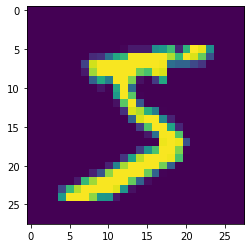

In [9]:
plt.imshow(single_image)

In [10]:
 y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [13]:
y_example = to_categorical(y_train)

In [14]:
y_example.shape

(60000, 10)

In [15]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [17]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [18]:
single_image.shape

(28, 28)

In [19]:
x_train = x_train/255

In [20]:
x_test = x_test/255

In [21]:
scaled_image = x_train[0]

In [22]:
scaled_image.shape

(28, 28)

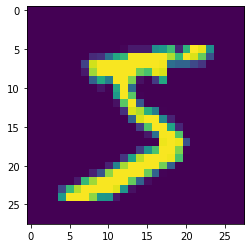

In [23]:
plt.imshow(scaled_image)

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
#batch_size, width, height, color_channels
x_train = x_train.reshape(60000,28,28,1)

In [26]:
x_train.shape

(60000, 28, 28, 1)

In [27]:
#batch_size, width, height, color_channels
x_test = x_test.reshape(10000,28,28,1)

In [28]:
x_test.shape

(10000, 28, 28, 1)

In [29]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [31]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

#OUTPUT LAYER
model.add(Dense(10,activation='softmax'))

In [33]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [36]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 28s 471us/sample - loss: 0.1435 - accuracy: 0.9566 - val_loss: 0.0766 - val_accuracy: 0.9750
Epoch 2/10
60000/60000 [==============================] - 31s 509us/sample - loss: 0.0484 - accuracy: 0.9851 - val_loss: 0.0446 - val_accuracy: 0.9846
Epoch 3/10
60000/60000 [==============================] - 35s 584us/sample - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.0343 - val_accuracy: 0.9874
Epoch 4/10
60000/60000 [==============================] - 34s 560us/sample - loss: 0.0213 - accuracy: 0.9935 - val_loss: 0.0501 - val_accuracy: 0.9843


In [37]:
metrics = pd.DataFrame(model.history.history)

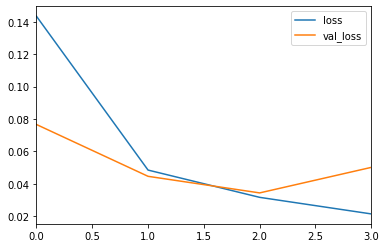

In [40]:
metrics[['loss','val_loss']].plot()

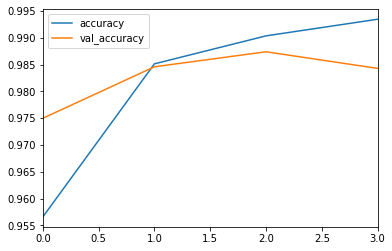

In [41]:
metrics[['accuracy','val_accuracy']].plot()

In [44]:
model.metrics_names

['loss', 'accuracy']

In [45]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.05009380373771128, 0.9843]

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
predictions = model.predict_classes(x_test)

In [48]:
y_cat_test.shape

(10000, 10)

In [49]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [52]:
print(confusion_matrix(y_test,predictions))

[[ 980    0    0    0    0    0    0    0    0    0]
 [   0 1130    3    0    0    0    2    0    0    0]
 [   6    2 1017    0    1    0    0    5    1    0]
 [   3    0    0  999    0    2    0    2    3    1]
 [   1    0    0    0  969    0    0    0    0   12]
 [   3    0    0    9    0  862   15    0    1    2]
 [  10    2    0    0    6    1  939    0    0    0]
 [   1    1    5    0    0    1    0 1014    1    5]
 [  12    0    2    1    1    0    5    1  948    4]
 [   4    2    0    6    3    2    0    4    3  985]]


In [53]:
import seaborn as sns

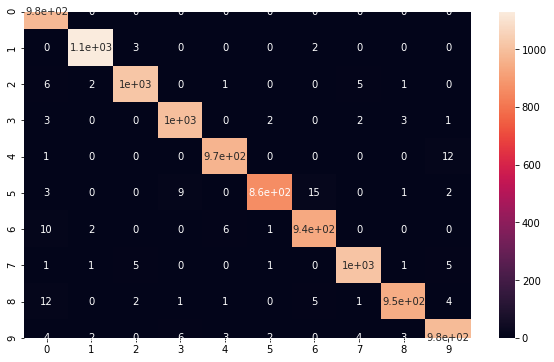

In [57]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [58]:
my_number = x_test[0]

In [60]:
my_number.shape

(28, 28, 1)

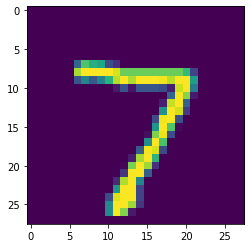

In [61]:
plt.imshow(my_number.reshape(28,28))

In [62]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])